In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import layers
from keras import models

Using TensorFlow backend.


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
X_train = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.
X_test = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [4]:
def model_arch():
    m = models.Sequential()
    m.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    m.add(layers.MaxPooling2D((2, 2)))
    m.add(layers.Conv2D(64, (3, 3), activation='relu'))
    m.add(layers.MaxPooling2D((2, 2)))
    m.add(layers.Conv2D(64, (3, 3), activation='relu'))
    m.add(layers.Flatten())
    m.add(layers.Dense(64, activation='relu'))
    m.add(layers.Dense(10, activation='softmax'))
    
    m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return m

model = model_arch()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [14]:
history = model.fit(X_train, y_train, epochs=20, batch_size=256)
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0028 - acc: 0.9992
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0026 - acc: 0.9993
Epoch 3/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0019 - acc: 0.9996
Epoch 4/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0018 - acc: 0.9995
Epoch 5/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0016 - acc: 0.9996
Epoch 6/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0016 - acc: 0.9996
Epoch 7/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0012 - acc: 0.9997
Epoch 8/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0019 - acc: 0.9996
Epoch 9/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0012 - acc: 0.9998
Epoch 10/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0012 - acc: 0.9997

In [8]:
print (test_acc)

0.9912


<IPython.core.display.Javascript object>


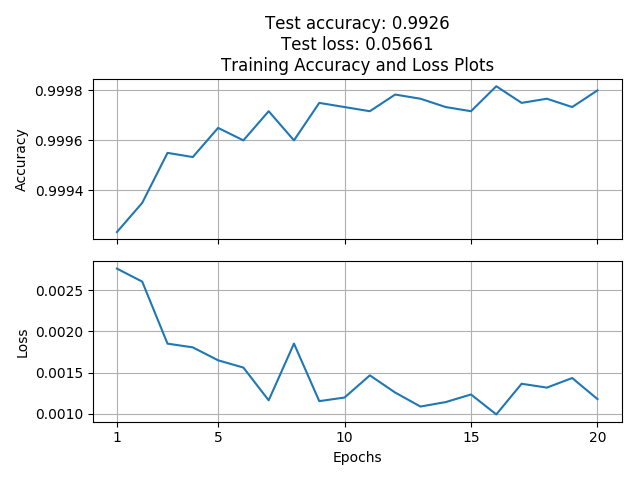

In [37]:
epochs = np.arange(1, 21)
acc = history.history['acc']
loss = history.history['loss']

fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(epochs, acc)
ax[0].set_ylabel('Accuracy')
ax[0].grid()

ax[1].plot(epochs, loss)
# ax[1].yaxis.tick_right()
ax[1].set_ylabel('Loss')
ax[1].set_xticks([1, 5, 10, 15, 20])
ax[1].grid()
ax[1].set_xlabel("Epochs")

ax[0].set_title("Test accuracy: {:.4}\nTest loss: {:.4}\nTraining Accuracy and Loss Plots".format(test_acc, test_loss))
plt.tight_layout()